Лабораторная работа 2.1
Вариант 2

Моя функция: ln(x+2) - x^2

Метод простых итераций решения нелинейного уравнения:
x: 1.1192689437732863, k: 1, q/(1-q)*|x_cur - x|: 0.07198705213657546
x: 1.0665827025939707, k: 2, q/(1-q)*|x_cur - x|: 0.00996169639599122
x: 1.05856686865929, k: 3, q/(1-q)*|x_cur - x|: 0.0015156007001183181
x: 1.0573298741082588, k: 4, q/(1-q)*|x_cur - x|: 0.000233885809369621

Метод Ньютона решения нелинейного уравнения:
x: 1.058135145295947, k: 1, |x_cur - x|: 0.04186485470405299
x: 1.0571041765600742, k: 2, |x_cur - x|: 0.0010309687358729391
x: 1.0571035499949695, k: 3, |x_cur - x|: 6.265651046888365e-07


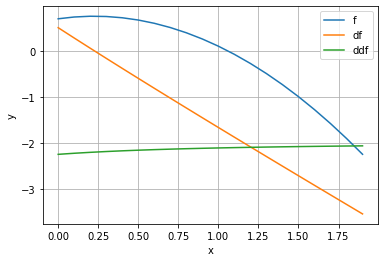

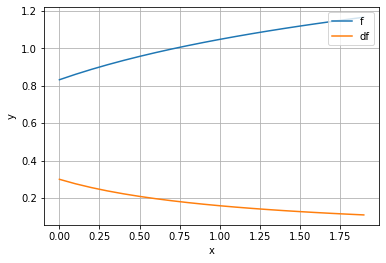

In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

def f(x):
    return math.log(x+2) - x**2

def df(x):
    return 1/(x+2) - 2*x

def ddf(x):
    return -1/(x+2)**2 - 2

def phi(x):
    return sqrt(math.log(x+2))

def dphi(x):
    return 1/(2*(x+2)*sqrt(math.log(x+2)))


def simpleIteration(phi, dphi, a, b, eps=0.001):
    q = max(abs(dphi(a)), abs(dphi(b)))
    x = (a + b) / 2
    k = 0
    go = True

    while go:
        k += 1
        x_cur = phi(x)

        print(f'x: {x_cur}, k: {k}, q/(1-q)*|x_cur - x|: {q * abs(x_cur - x) / (1 - q)}')
        if (q * abs(x_cur - x) / (1 - q)) <= eps:
            go = False

        x = x_cur
        if k == 10:
            break


def newton(f, df, x0, eps=0.001):
    x = x0
    k = 0
    go = True
    while go:
        k += 1
        x_cur = x - f(x) / df(x)
        print(f'x: {x_cur}, k: {k}, |x_cur - x|: {abs(x_cur - x)}')
        if abs(x_cur - x) <= eps:
            go = False

        x = x_cur


def show(f, df, x, file = None, step = 0.5, ddf = None):
    X = np.arange(x[0], x[-1], step)
    Y = [f(i) for i in X]
    dY = [df(i) for i in X]

    if ddf:
        ddY = [ddf(i) for i in X]

    fig, axis = plt.subplots()
    axis.plot(X, Y, label='f')
    axis.plot(X, dY, label='df')

    if ddf:
        axis.plot(X, ddY, label='ddf')

    axis.legend(loc='upper right')
    axis.grid()
    
    axis.set_xlabel('x')
    axis.set_ylabel('y')

    if file:
        fig.savefig(file)
        print(f'File {file} was saved correctly')
        plt.close(fig)

    plt.show()


if __name__ == '__main__':
    print('Лабораторная работа 2.1\nВариант 2')
    print('\nМоя функция: ln(x+2) - x^2')
    print("\nМетод простых итераций решения нелинейного уравнения:")
    simpleIteration(phi, dphi, 1, 2)
    print("\nМетод Ньютона решения нелинейного уравнения:")
    newton(f, df, 1.1)
    show(f, df, [0, 2], step=0.1, ddf=ddf)
    show(phi, dphi, [0, 2], step=0.1)